<a href="https://colab.research.google.com/github/zinebzannouti/Web-Scraping/blob/main/Solution/2_Scrape_VIN_number_using_BeautifulSoup_and_Request.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scrape VIN number to get vehicule attributs using **BeautifulSoup** and **Request** 

- Dans cet atelier, nous allons voir comment utiliser Python pour extraire les informations du véhicule à partir de son numéro VIN (Vehicle Identification Number).

- Un **VIN** se compose de 17 caractères (chiffres et lettres majuscules) qui agissent comme un identifiant unique pour le véhicule.

-  Il s'agit d'un code unique qui est attribué à chaque véhicule automobile lors de sa fabrication.

- Le **VIN** peut être utilisé pour extraire des informations sur un véhicule comme le pays dans lequel il a été fabriqué, son fabricant, etc.

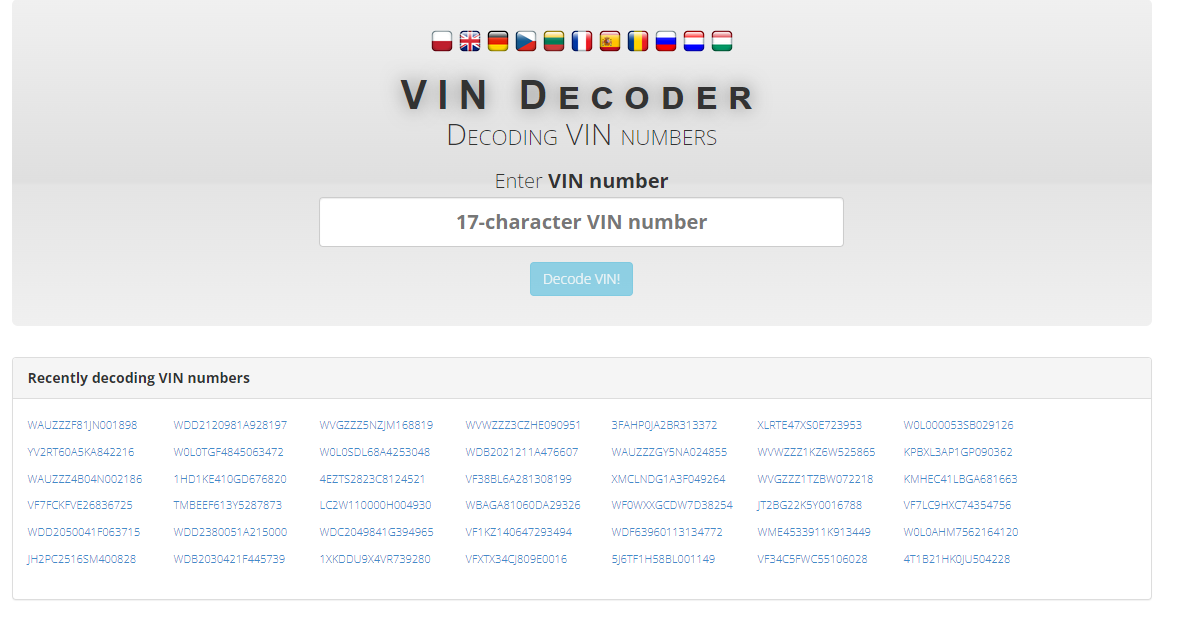

**Import libraries**

In [ ]:
import pandas as pd
from tqdm.notebook import tqdm
import json
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup

**Read our Data with Pandas**

In [ ]:
df_vin=pd.read_csv('/content/vin_11.csv')

In [ ]:
df_vin.shape

(50480, 1)

In [ ]:
df_vin

,vin_11
0,JTEBZ29J900
1,MR0CS11G300
2,WBA5E51090G
3,WDB2011221A
4,UU1HSDCFW57
...,...
50475,ZD4TLA0018S
50476,ZD4VFD00865
50477,ZD4LY0000US
50478,JTMRBREV0DD


**Define Attributs**

In [ ]:
n={'Adress line 1':'Adress_line_1', 'Adress line 2':'Adress_line_2',
       'Model year':'Model_year','Trim level':'Trim_level', 'Body style':'Body_style', 'Engine type':'Engine_type',
                   'Fuel type':'Fuel_type','Vehicle class':'Vehicle_class', 'Vehicle type':'Vehicle_type',
                   'Manufactured in':'Manufactured_in', 'Assembly plant':'Assembly_plant'}

- **TQDM** est un excellent package optionnel que nous pouvons inclure dans n'importe quelle fonction longue et itérable.
- Si vous enveloppez **TQDM** sur l'itérable, il suivra la progression de votre fonction sous la forme d'une barre de chargement ci-dessous !

In [ ]:
nb=0
vin=list()
#Iterate our df_vin from nb to nb+100 , we will have 100 line to process, we will use tqdm to see the progress bar
for i in tqdm(df_vin['vin_11'][nb:nb+100], desc='First Octet'):
  #Define a list d
  d={}
  d={ 'vin_11':i[:11],
      'vin_pref':i[:8]+i[9]
      }
  #Define our URL and Website to scrape from  
  quotes_page='https://vindecoder.pl/'+i+'692889'
  # grab website and store in variable uClient
  uClient=uReq(quotes_page)
  # read and close HTML
  page_html = uClient.read()
  uClient.close()
  # call BeautifulSoup for parsing
  page_soup = soup(page_html, 'html.parser')
  # grabs all the products under table attributs
  tab= page_soup.findAll('table' ,attrs={'class':"table table-striped table-two-col"})
  #Iterate over tab[:3:2] with tqdm
  for quote in tqdm(tab[:3:2], desc='Second Octet',leave=False):
    #Iterate over quote with tqdm
    for j in tqdm(quote, desc='Third Octet',leave=False):
      #Verify if the keys extracted are the same as we defined in our list n   
      if str(j.find('th').text.strip()) in n.keys():
        #collect th (name of the attributs)  and td(Value of the attributs) from the website and put it in our list d
        d[n.get(j.find('th').text.strip())]=j.find('td').text.strip()
      else:
          #pass
        d[j.find('th').text.strip()]=j.find('td').text.strip()      
  vin.append(d)
print(d)

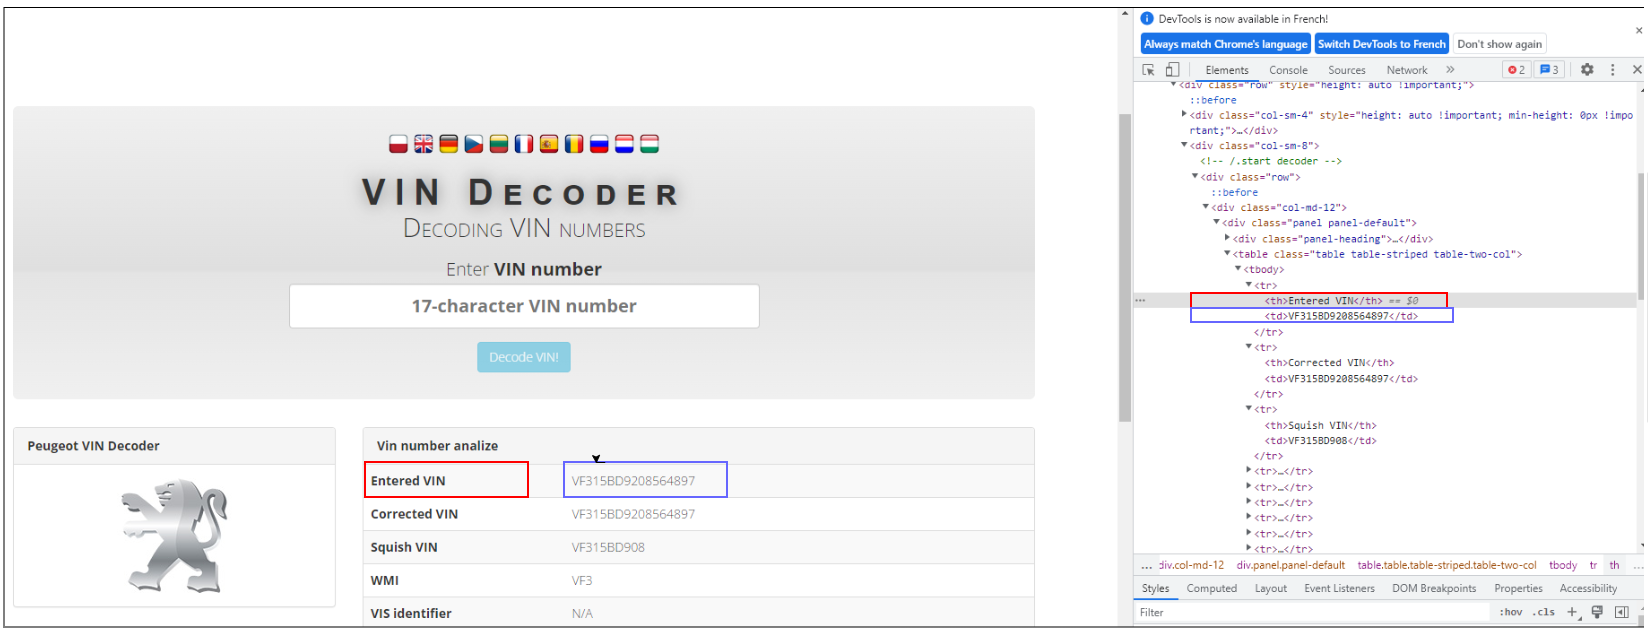

In [ ]:
vin

**Save the output in a json file**

In [ ]:
with open('vin_12_WB.json', 'w') as outfile:
    json.dump(vin, outfile)


**Convert file to csv**

In [ ]:
df = pd.read_json('/content/vin_12_WB.json')

In [ ]:
df.to_csv('data.csv')

In [ ]:
df.head(10)

,vin_11,vin_pref,Manufacturer,Adress_line_1,Adress_line_2,Region,Country,Note,Make,Model,Trim_level,Body_style,Engine_type,Manufactured_in,Vehicle_class,Vehicle_type,Model_year,Fuel_type,Transmission,Assembly_plant
0,JTEBZ29J900,JTEBZ29J0,Toyota Motor Corp,1 Toyota-cho Toyota -Shi,471-8571 Aichi-Ken,Asia,Japan,Manufacturer builds more than 500 vehicles per...,Toyota,Landcruiser,Generation IV,5 Doors Off Road,3.0,Japan,NaN,NaN,NaN,NaN,NaN,NaN
1,MR0CS11G300,MR0CS11G0,Toyota Motor Thailand Co Ltd,186/1 Mu 1 Old Railway Rd.,T. Samrong Tai A. Phra Pradaeng,Asia,Thailand,Manufacturer builds more than 500 vehicles per...,Toyota,Hilux,NaN,NaN,NaN,Thailand,Pickup SUV,Pickup SUV,NaN,NaN,NaN,NaN
2,WBA5E51090G,WBA5E5100,Bayerische Motoren Werke AG,Muenchen 13,Muenchen 13,Europe,Germany,Manufacturer builds more than 500 vehicles per...,BMW,5-Series,NaN,NaN,NaN,Germany,Large Car,Passenger car,NaN,NaN,NaN,NaN
3,WDB2011221A,WDB201121,Daimler AG,Mercedesstrasse 137,D-70546 Stuttgart,Europe,Germany,Manufacturer builds more than 500 vehicles per...,Mercedes-Benz,D 2.0,W201,4 Doors Sedan,2.0L RWD,Germany,Large family car,Passenger car,1992.0,Diesel,Manual,NaN
4,UU1HSDCFW57,UU1HSDCF5,Intreprinderea De Autoturisme,R-0401 Colibasi-Pitesti,"Romania,",Europe,Romania,Manufacturer builds more than 500 vehicles per...,Dacia,NaN,NaN,NaN,NaN,Romania,NaN,NaN,2005.0,NaN,NaN,NaN
5,WDB2100171A,WDB210011,Daimler AG,Mercedesstrasse 137,D-70546 Stuttgart,Europe,Germany,Manufacturer builds more than 500 vehicles per...,Mercedes-Benz,E 290 Turbo-d,W210,4 Doors Sedan,2.9L L5 SOHC 10V RWD,Germany,Executive car,Passenger car,1998.0,Diesel,Automatic,NaN
6,KN33AP3SSYK,KN33AP3SY,Kia Motors Corp,781-1 Soha-Dong,Kwangmyung-Shi Kyunggi-Do 423-701,Asia,South Korea,Manufacturer builds more than 500 vehicles per...,Kia,NaN,NaN,NaN,NaN,South Korea,NaN,NaN,2000.0,NaN,NaN,NaN
7,WVWZZZ1GZLW,WVWZZZ1GL,Volkswagen AG,Wolfsburg/Hannover,Wolfsburg/Hannover,Europe,Germany,Manufacturer builds more than 500 vehicles per...,Volkswagen,Golf,NaN,3/5 Doors Hatchback,NaN,Germany,Compact Car,Passenger car,1990.0,NaN,NaN,NaN
8,W0L0SDL68A4,W0L0SDL6A,Adam Opel AG,Bahnhofsplatz,65423 Russelsheim,Europe,Germany,Manufacturer builds more than 500 vehicles per...,Opel,Corsa,NaN,5 Doors Hatchback,NaN,Spain,Subcompact Car,Passenger car,2010.0,NaN,NaN,Zaragoza
9,UU10SDAW455,UU10SDAW5,Intreprinderea De Autoturisme,R-0401 Colibasi-Pitesti,"Romania,",Europe,Romania,Manufacturer builds more than 500 vehicles per...,Dacia,Dokker,NaN,NaN,1.5,Romania,NaN,NaN,2005.0,Diesel,NaN,NaN
